# OpenBCI Experiment Toolkits
This is a tutorial about how to create external triggers in a video, assemble external trigger receiver with photoresistors, label, segment and analyze neural data with OpenBCI hardwares.

# Before Start
1. Install opencv packages by ```pip install opencv-python```
2. Collect 5 images in each class (e.g. Puppies and Kiddens) and save them in ./images. Name them with the routime: class_number.jpg (e.g. Cat_1.jpg)

# Step 1: Create a customized experiment video with black-and-white square flicker embedded.

It is recommended to build your customized experiment video from **Quick Start**. If you would like to explore more possibilities, please feel free to change the arguments in ```settings.json```.

#### Quick Start
1. Install OpenCV packages by ```pip install opencv-python```
2. Find the folder ```./Images/Image_Class/Cat```. Put the kitten images in this folder.
3. Find the folder ```./Images/Image_Class/Dog```. Put the puppie images in this folder.
4. In the terminal, change directory to the current folder or type ```cd /Puppies_and_Kittens/```. Then type ```python ExternalTriggerCreator.py -l settings.json```. The experiment video ```project_video.mp4``` and the corresponding labels ```label.txt``` will be output in the folder ```./```

#### Arguments in json file with default values
1. "image_base_path": "./Images/", directory that stores all the images including welcome page and classification image pages.
2. "image_types": ["Cat", "Dog"], 
3. "video_time": 3000, default time for each image to appear (ms)
4. "trigger_interval": 100, time for the trigger to flick one time (ms)
5. "flick_times": 5, times for the trigger to flick at the begining and ending of the video (ms)
6. "fps": 20, 
7. "screen_size": [500, 400], 
8. "time_range_per_image": [3.5, 6.5], 
9. "video_output": "project_video.mp4",
10. "label_output": "labels.txt",
11. "trigger_position": [0, 300, 100, 400], [x_start, y_start, x_end, y_end]

#### Experiment Video
![Experiment Video](./ExperimentImage.PNG)

# Step 2: Assemble an external trigger receiver with photoresistor and OpenBCI hardware.

Special credit to ```andyh616``` from OpenBCI Forum!

Option 1: OpenBCI Experiment Toolkits

Option 2: Build toolkits by yourself

# Step 3:  Collect neural data with OpenBCI hardware and GUI.

# Step 4: Label, segment and analyze the neural data.

On windows, the collected data can be found in ```C:\Users\username\Documents\OpenBCI_GUI\Recordings```. We will label this data set with the text file ```labels.txt``` created in **Step 1**.

#### First of all, let's read the collected neural data with columns: 'index', 'ch1', ... , 'ch8', 'A7', 'TimeStamp'.  
***'index'***: index of data row  
***'ch1' to 'ch8'***: EEG channel data  
***'A7'***: analog channel data  

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

openbci_datapath = '../record.txt'
sample_rate = 250

data = pd.read_csv(openbci_datapath, sep=",", header=6, index_col=False, names=['index', 'ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6', 'ch7', 'ch8', 'A5', 'A6', 'A7', 'Time', 'TimeStamp'], usecols=['ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6', 'ch7', 'ch8', 'A7', 'TimeStamp'])
print("OpenBCI data shape: ", data.shape)

OpenBCI data shape:  (55791, 10)


#### Select timestamp

In [9]:
Timestamps = (data['TimeStamp'].to_numpy() - data['TimeStamp'].to_numpy()[0])/1000
print("Timestamps shape: ", Timestamps.shape)
print("Total length of data: ", Timestamps[-1], 's')

Timestamps shape:  (55791,)
Total length of data:  222.321 s


#### Select EEG data and plot.

EEG data shape:  (55791, 8)


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

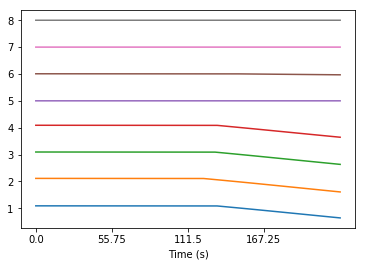

In [10]:
EEG_data = data[['ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6', 'ch7', 'ch8']].to_numpy()
print("EEG data shape: ", EEG_data.shape)
for i in range(EEG_data.shape[1]):
    plt.plot(EEG_data[:,i]/np.mean(EEG_data[:,i])+i)
plt.xticks(ticks=np.arange(0, round(Timestamps[-1]+1)*sample_rate, round(Timestamps[-1]+1)*sample_rate/4), 
           labels=np.arange(0, round(Timestamps[-1]+1),round(Timestamps[-1]+1)/4))
plt.xlabel('Time (s)')
plt.tight_layout

#### Select analog data and plot.

analog data shape:  (55791,)


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

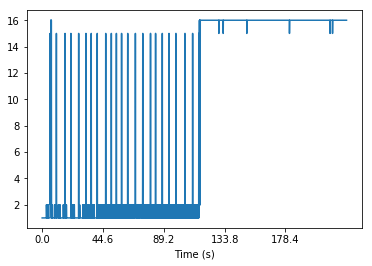

In [11]:
analog_data = data['A7']
print("analog data shape: ", analog_data.shape)
plt.plot(analog_data)
plt.xticks(ticks=np.arange(0, round(Timestamps[-1]+1)*sample_rate, round(Timestamps[-1]+1)*sample_rate/5), 
           labels=np.arange(0, round(Timestamps[-1]+1),round(Timestamps[-1]+1)/5))
plt.xlabel('Time (s)')
plt.tight_layout

#### Detect spikes in analog channel.

Total number of peaks:  38


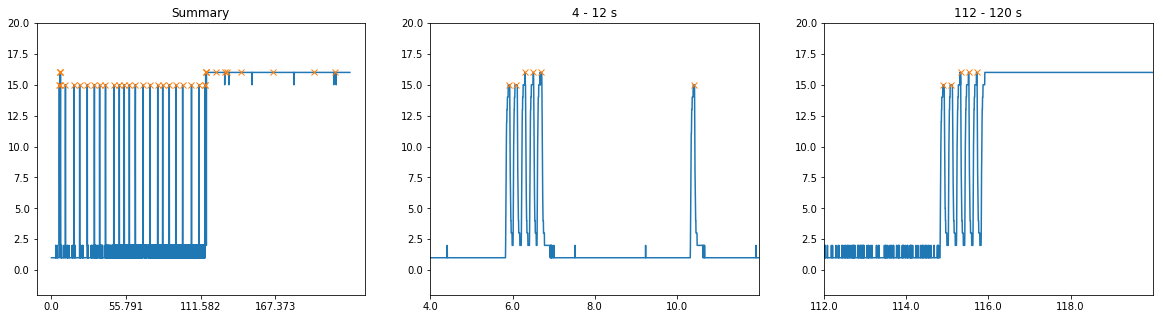

In [12]:
peaks, _ = find_peaks(analog_data, height=(5, 20), distance=0.1*250) # distance is essential!
fig, ax = plt.subplots(1, 3, figsize=(20,5))

ax[0].plot(analog_data)
ax[0].plot(peaks, analog_data[peaks], "x")
ax[0].set_ylim(-2, 20)
ax[0].title.set_text('Summary')
ax[0].set_xticks(ticks=np.arange(0, len(analog_data), len(analog_data)/4))
ax[0].set_xticklabels(labels=np.arange(0, len(analog_data)/250,len(analog_data)/250/4))

# Start 
ax[1].plot(analog_data)
ax[1].plot(peaks, analog_data[peaks], "x")
ax[1].set_xlim(1000,3000)
ax[1].set_ylim(-2, 20)
ax[1].title.set_text('4 - 12 s')
ax[1].set_xticks(ticks=np.arange(1000, 3000, 2000/4))
ax[1].set_xticklabels(labels=np.arange(1000/250, 3000/250, 2000/250/4))

# End
ax[2].plot(analog_data)
ax[2].plot(peaks, analog_data[peaks], "x")
ax[2].set_xlim(28000,30000)
ax[2].set_ylim(-2, 20)
ax[2].title.set_text('112 - 120 s')
ax[2].set_xticks(ticks=np.arange(28000, 30000, 2000/4))
ax[2].set_xticklabels(labels=np.arange(28000/250, 30000/250, 2000/250/4))

fig.savefig('fig.png')

print("Total number of peaks: ", len(peaks))

#### From the figure above, the combination of the first 4 peaks is the indicator of the start of the video. From Step 1, there will be totally 22 peaks indicating the start of each image.

In [13]:
image_peaks = peaks[4:4+22]
len(image_peaks)

22

#### Insert labels into the raw data set: Puppies: 1 vs Kittens: 2

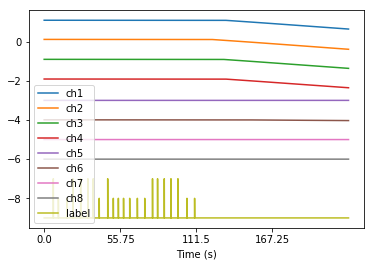

In [14]:
label_path = '../labels_version_3.txt'

label_data = pd.read_csv(label_path, sep=',', index_col=False, names=['label_index', 'label', 'filename'])
index_array = label_data['label_index'].to_numpy()
labels = np.zeros(len(EEG_data))

for i in range(len(image_peaks)):
    peak_timestamp = image_peaks[i]
    labels[peak_timestamp] = index_array[i]+1
    

for i in range(EEG_data.shape[1]):
    plt.plot(EEG_data[:,i]/np.mean(EEG_data[:,i])-i)
plt.xticks(ticks=np.arange(0, round(Timestamps[-1]+1)*sample_rate, round(Timestamps[-1]+1)*sample_rate/4), 
           labels=np.arange(0, round(Timestamps[-1]+1),round(Timestamps[-1]+1)/4))
plt.plot(labels-i-2)
plt.xlabel('Time (s)')
plt.tight_layout
plt.legend(['ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6', 'ch7', 'ch8', 'label'])